# Report task 2: Benchmarking two ML algorithms



## Introduction

The purpose of this report is to compare some techniques to create Machine Learning models. 

In this file you will find some code written in comments. This is code that is only necessary to run on Streamlit. The version on Streamlit will have that code not in comments. 

Streamlit link:  https://rafengelenaitask2.streamlit.app

## The Dataset

I have chosen the following dataset for this task: https://archive.ics.uci.edu/dataset/101/tic+tac+toe+endgame.

The data contains no headers, this is why i create them myself. 
The data can be used for supervised machine learning. The data is labeled, the column "x has won" contains the labels in which the data is catecorized.

In [368]:
import pandas as pd
feature_cols=[
    "top-left", "top-middle", "top-right", 
    "middle-left", "middle-middel", "middle-right", 
    "bottom-left", "bottom-middle", "bottom-right" 
    ]
tictactoe_df = pd.read_csv("data/tic-tac-toe.data",
                           sep=',',
                           header=None, 
                           names=feature_cols+["x has won"]
                           )
                           
print(tictactoe_df)

    top-left top-middle top-right middle-left middle-middel middle-right  \
0          x          x         x           x             o            o   
1          x          x         x           x             o            o   
2          x          x         x           x             o            o   
3          x          x         x           x             o            o   
4          x          x         x           x             o            o   
..       ...        ...       ...         ...           ...          ...   
953        o          x         x           x             o            o   
954        o          x         o           x             x            o   
955        o          x         o           x             o            x   
956        o          x         o           o             x            x   
957        o          o         x           x             x            o   

    bottom-left bottom-middle bottom-right x has won  
0             x             o   

### Exploratory Data Analysis

First we research the data out of the dataset. By using the describe function we get some interesting information about the data. We see the amount of values in each column, how many unique values there are in each column, which value is the most frequent value and how many times that value is in that column.

We can also find out how many null values there are in each column by using the isna function. We see that the data does not have any null values.

In [369]:
print(tictactoe_df.describe(),"\n\n",tictactoe_df.isna().sum(), sep="")


       top-left top-middle top-right middle-left middle-middel middle-right  \
count       958        958       958         958           958          958   
unique        3          3         3           3             3            3   
top           x          x         x           x             x            x   
freq        418        378       418         378           458          378   

       bottom-left bottom-middle bottom-right x has won  
count          958           958          958       958  
unique           3             3            3         2  
top              x             x            x  positive  
freq           418           378          418       626  

top-left         0
top-middle       0
top-right        0
middle-left      0
middle-middel    0
middle-right     0
bottom-left      0
bottom-middle    0
bottom-right     0
x has won        0
dtype: int64


### Splitting the data

We need 2 sets of data, one to train the model and the other to test the model. 

In [370]:
from sklearn.model_selection import train_test_split

X = tictactoe_df[feature_cols] # Features
y = tictactoe_df[['x has won']] # target variable
  

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


#### encoding

Because the data in the features are strings, I need to encode the data. This encoding is necessary because Scikit requires the values to be floats. This encoding gives a numeric value the different string categories. This can be done in different ways. 2 of the most often used encoding methods are Label Encoding and One Hot Encoding. 

Label encoding gives each categorical value of a feature a numerical value. If there are 3 different categorical values, these will be encoded to [1,2,3]. This encoding method is requires not much computational power. But it will create an order in the data.

One Hot Encoding will generate a new column for each categorical value in a feature. In each column there will be 2 possible values, 0 and 1. 0 means the item does not have the specific value of that column.  1 means the item does have the specific value of that column. This will create more variables and it requires a lot more computational power. 

Our data is not nominal ["o", "x", "b"], there is no certain order. This hints that One Hot Encoding will be better for this dataset. That is why I will use One Hot Encoding.

In [371]:
import category_encoders as ce

# label encoding
# ce_ord = ce.OrdinalEncoder(cols = feature_cols)
# X_train_cat = ce_ord.fit_transform(X_train)
# X_test_cat = ce_ord.fit_transform(X_test)

# hot encoding
ce_oh = ce.OneHotEncoder(cols = feature_cols)
X_train_cat_oh = ce_oh.fit_transform(X_train)
X_test_cat_oh = ce_oh.fit_transform(X_test)
print(X_train_cat_oh)

     top-left_1  top-left_2  top-left_3  top-middle_1  top-middle_2  \
216           1           0           0             1             0   
410           0           1           0             1             0   
609           0           0           1             0             1   
692           1           0           0             1             0   
179           1           0           0             1             0   
..          ...         ...         ...           ...           ...   
635           1           0           0             0             0   
467           0           1           0             0             1   
689           1           0           0             1             0   
866           0           1           0             0             1   
308           0           1           0             0             0   

     top-middle_3  top-right_1  top-right_2  top-right_3  middle-left_1  ...  \
216             0            1            0            0           

## Baseline (Decision Tree)

For the baseline model, I have chosen decision tree. 

The basic idea behind a decision tree is to recursively split the dataset into subsets based on the values of different features. Each internal node in the tree represents a decision based on a specific feature, and each leaf node represents the predicted outcome. In each internal node, it will review a specific feature and makes a decision based on that feature. 

The technique is popular due to it's simplicity and it's visual nature. They can however be prone to overfitting. Because the nodes in the tree works exactly for the train data set, it is most likely overfitted.

First we need to import some modules.

In [372]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

create model (kies entropy of gini zoek op wat het verschil is tussen de 2)

In [373]:
clf_baseline = DecisionTreeClassifier(criterion = "entropy")
clf_baseline = clf_baseline.fit(X_train_cat_oh, y_train)

Here we can draw the decision tree that our model has created.

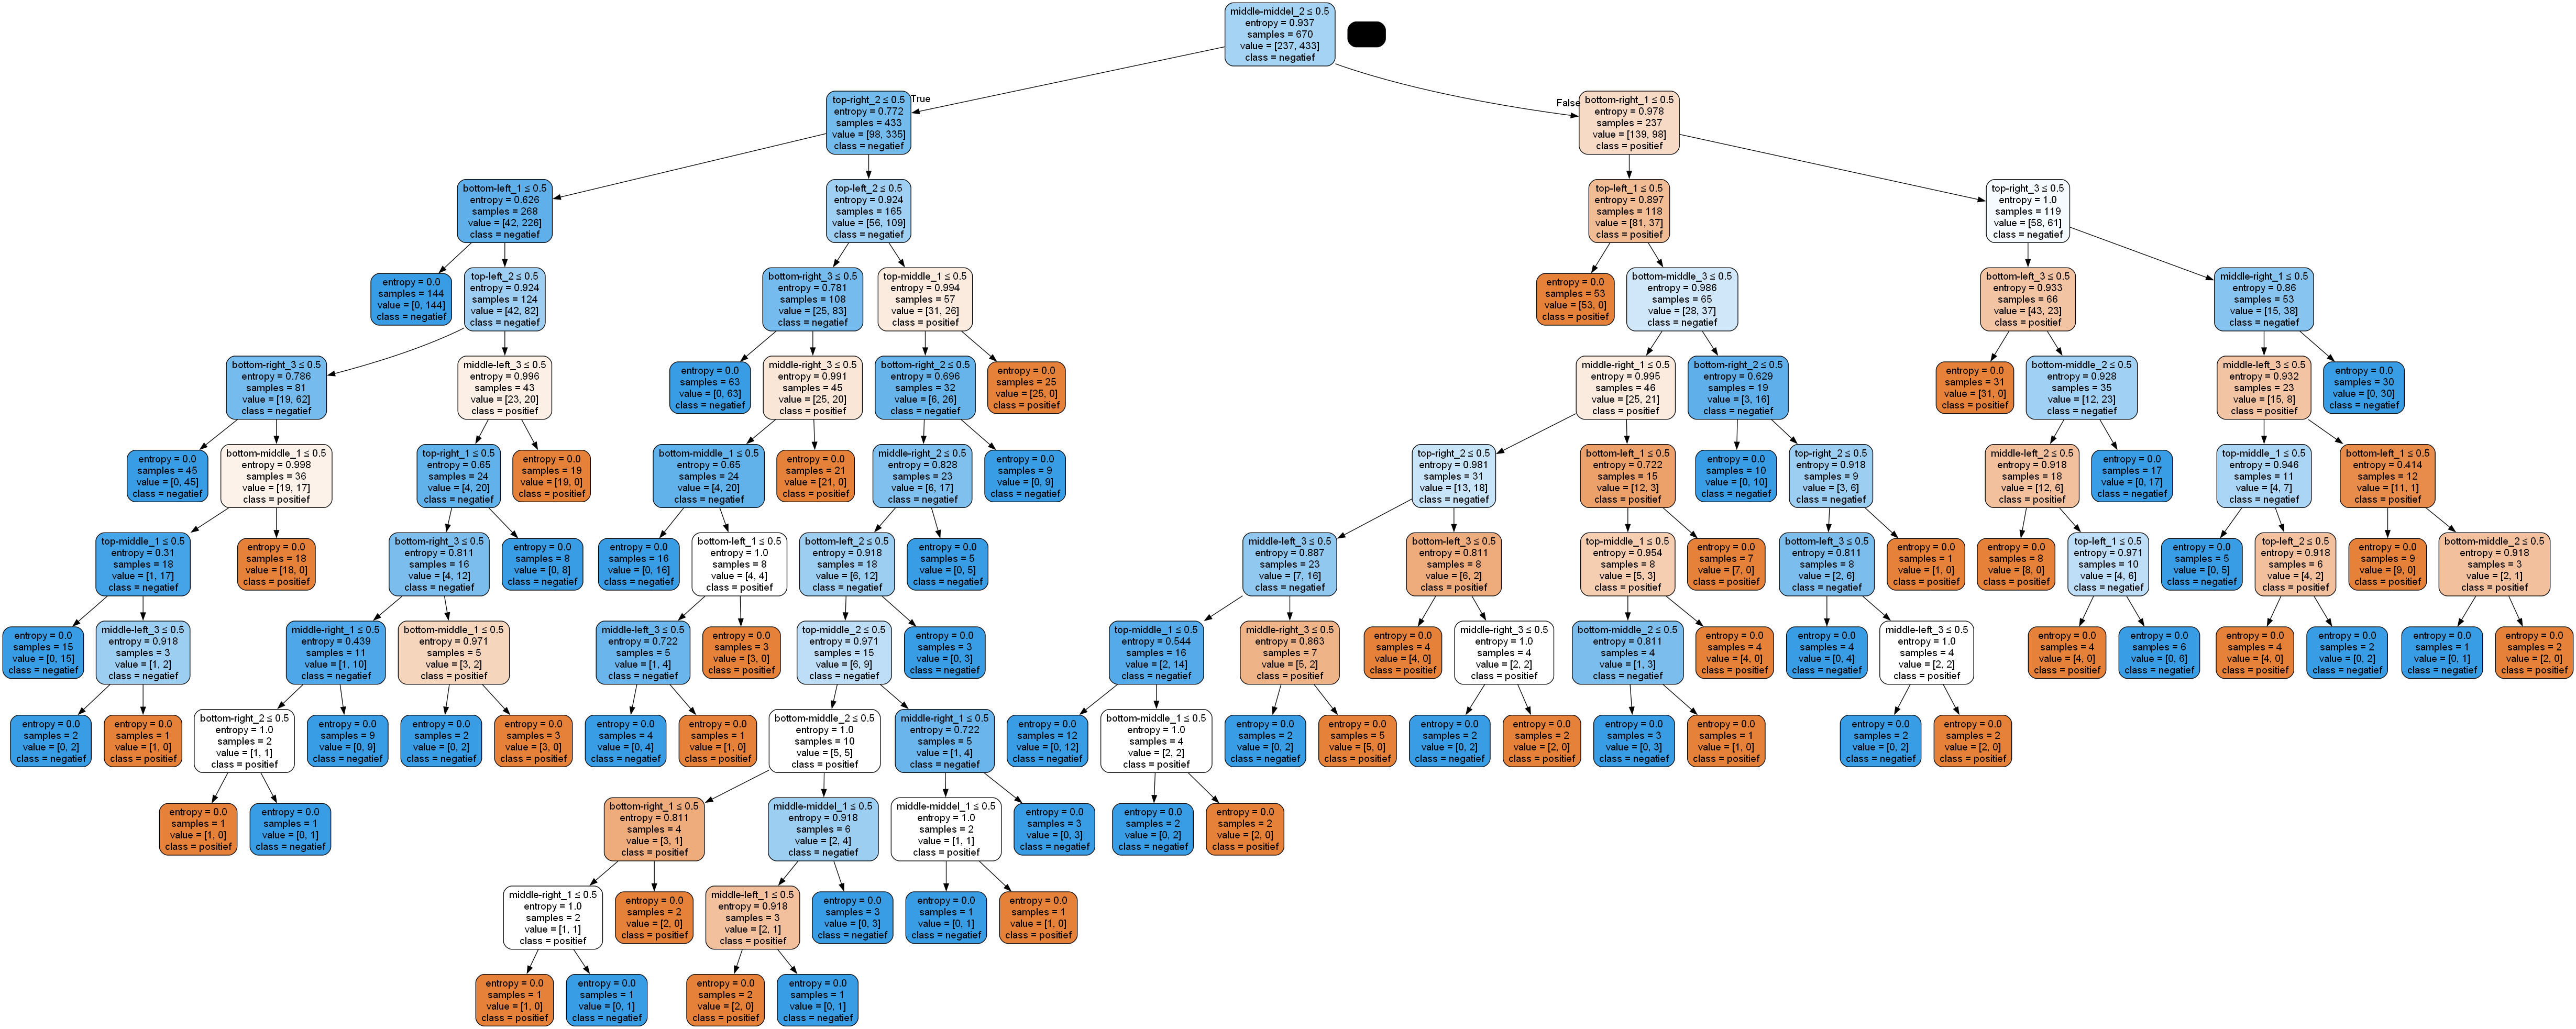

In [374]:
dot_data = StringIO()
export_graphviz(clf_baseline, 
                out_file = dot_data, 
                filled = True, 
                rounded = True,
                special_characters = True, 
                feature_names = X_train_cat_oh.columns, 
                class_names=['positief', 'negatief']
                )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
tree_image = Image(graph.create_png(), width=2000)
tree_image

Now I can use the model to predict the results for the test dataset.

In [375]:
y_pred_baseline = clf_baseline.predict(X_test_cat_oh)

Because I want to collect information about the model. I want to show the confusion matrix and calculate the accuracy. We want this for the models we will after the baseline model as well, so we will create a function that prints the information we want to see.

First we create and print the confusion matrix. Because the diagonal from the upper left has all the correct predictions, we can easily sum these up to get the amount of correct predictions. We can also calculate the total amount of predictions we have made. At last we can also calculate the accuracy.

In [376]:
import streamlit as st
def print_confusion(actual, prediction):

    confusion = confusion_matrix(actual, prediction, labels = ["positive", "negative"])
    print(f"Confusion matrix: \n{confusion}")
    st.write(f"Confusion matrix: \n{confusion}")

    # Good predictions: 
    correct_predictions = confusion.diagonal().sum()
    print(f"Amount of correct predictions: {correct_predictions}")
    st.write(f"Amount of correct predictions: {correct_predictions}")

    # Accuracy:
    print(f"Accuracy: {accuracy_score(actual, prediction)}")
    st.write(f"Accuracy: {accuracy_score(actual, prediction)}")
    # Ook mogelijk voor accuracy: print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

Now we can use this function with out the outcomes of the test dataset and the predictions my model has made.

In [377]:
print_confusion(y_test, y_pred_baseline)

Confusion matrix: 
[[131  62]
 [ 47  48]]
Amount of correct predictions: 179
Accuracy: 0.6215277777777778


## Gaussian Naive Bayes

It is an extension of Naive Bayes and uses the Bayes theorem. Naive comes from the fact that the technique sees the features as completely independant. This will cause some error in the model but is overal not a big error. The independance of features makes sure that the technique is simple and powerful.

In [378]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

clf_gnb= GaussianNB().fit(X_train_cat_oh, y_train)
y_pred_gnb = clf_gnb.predict(X_test_cat_oh)
print_confusion(y_test, y_pred_gnb)


Confusion matrix: 
[[137  56]
 [ 60  35]]
Amount of correct predictions: 172
Accuracy: 0.5972222222222222


c:\Users\rafen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Multi-layer Perceptron (Neural network)

The Multilayer Perceptron is a neural network where the mapping between inputs and output is non-linear. It has multiple input layers, output layers and also some hidden layers. Each layer is composed of interconnected nodes, referred to as neurons. In the input layer, each node represents a feature of the input data. The hidden layers, placed between the input and output layers, contain nodes that transform the input data through weighted connections and activation functions. The output layer produces the final predictions or classifications based on the transformed information from the hidden layers.

In [379]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier().fit(X_train_cat_oh, y_train)
y_pred_mlp = clf_mlp.predict(X_test_cat_oh)
print_confusion(y_test, y_pred_mlp)


c:\Users\rafen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix: 
[[ 90 103]
 [ 41  54]]
Amount of correct predictions: 144
Accuracy: 0.5


c:\Users\rafen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Compare models

In [380]:
print("Decision Tree:")
print_confusion(y_test, y_pred_baseline)
print("\nGaussian Naive Bayes")
print_confusion(y_test, y_pred_gnb)
print("\nMulti-layer Perceptron")
print_confusion(y_test, y_pred_mlp)

Decision Tree:
Confusion matrix: 
[[131  62]
 [ 47  48]]
Amount of correct predictions: 179
Accuracy: 0.6215277777777778

Gaussian Naive Bayes
Confusion matrix: 
[[137  56]
 [ 60  35]]
Amount of correct predictions: 172
Accuracy: 0.5972222222222222

Multi-layer Perceptron
Confusion matrix: 
[[ 90 103]
 [ 41  54]]
Amount of correct predictions: 144
Accuracy: 0.5


I have tried the previous code a few times and these were the results:

Comparison 1

![Comparison 1](./assets/try1.PNG "Comparison 1")

Comparison 2

![Comparison 2](./assets/try2.PNG "Comparison 2")

Comparison 3

![Comparison 3](./assets/try3.PNG "Comparison 3")

Comparison 4

![Comparison 4](./assets/try4.PNG "Comparison 4")

Comparison 5

![Comparison 5](./assets/try5.PNG "Comparison 5")

We can see that all models have a fluctuating accuracy, this of course depends on the training data. The Decision Tree stands out over these experiments as a better option. But of course this sample is too small to make any assumptions.

## Streamlit

I want to use the cache of streamlit. Reason being is that when I press a button, everything is being executed again. This is not good if we want to use the same test and training data for all the techniques and also for performance of the application. That's why everything I have coded above will be removed from the streamlit app and moved to a main function. With this we can use sessions.

In [381]:
st.header('Raf Engelen - r0901812 - 3APP01', divider='gray')
st.title("Task 2 ML: Benchmarking two ML algorithms")
option = st.sidebar.selectbox(
    'Choose machine learning model',
    ('Decision Tree', 'Gaussian Naive Bayes', 'Multi-layer Perceptron')
)
if option == 'Decision Tree':
    st.subheader("Decision Tree")
    print_confusion(y_test, y_pred_baseline)
elif option == 'Gaussian Naive Bayes':
    st.subheader("Gaussian Naive Bayes")
    print_confusion(y_test, y_pred_gnb)
elif option == 'Multi-layer Perceptron':
    st.subheader("Multi-layer Perceptron")
    print_confusion(y_test, y_pred_mlp)


Confusion matrix: 
[[131  62]
 [ 47  48]]
Amount of correct predictions: 179
Accuracy: 0.6215277777777778


## Bronnenlijst:

1.9. Naive Bayes. (z.d.). scikit-learn. https://scikit-learn.org/stable/modules/naive_bayes.html

Dash, S. (2023, 3 november). Decision Trees explained — entropy, information gain, Gini index, CCP pruning. Medium. https://towardsdatascience.com/decision-trees-explained-entropy-information-gain-gini-index-ccp-pruning-4d78070db36c 

Sethi, A. (2023, 15 juni). One Hot Encoding vs. label encoding using SciKit-Learn. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/#:~:text=Label%20encoding%20is%20simpler%20and,lead%20to%20high-dimensional%20data 

UCI Machine Learning Repository. (z.d.). https://archive.ics.uci.edu/dataset/101/tic+tac+toe+endgame

Zach. (2022, 8 augustus). Label encoding vs. one hot encoding: What’s the difference? Statology. https://www.statology.org/label-encoding-vs-one-hot-encoding/

Vats, R. (z.d.). Top 12 Commerce Project Topics & Ideas in 2023 [For Freshers]. upGrad blog. https://www.upgrad.com/blog/gaussian-naive-bayes/

Bento, C. (2022, 5 januari). Multilayer Perceptron explained with a Real-Life example and Python code: Sentiment analysis. Medium. https://towardsdatascience.com/multilayer-perceptron-explained-with-a-real-life-example-and-python-code-sentiment-analysis-cb408ee93141